In [7]:
import numpy as np
import ssm
import matplotlib.pyplot as plt

from run import run_switching_experiment
from src.data.experiment_data import ExperimentData
from src.features.fit_curves import get_sigmoid_feats
from src.features.losses import mse_loss

In [3]:
trans_matrix = np.array([[0.70, 0.30],
                         [0.30, 0.70]])
trunc_actions, state_history = run_switching_experiment(trans_matrix)

sigmoid_params = get_sigmoid_feats(trunc_actions, mse_loss, plot=False)

100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 180.01it/s]


In [4]:
print(sigmoid_params)

[[  0.12824946   4.           1.4999713 ]
 [  0.           0.84871771   1.41240871]
 [  0.12833462   4.           0.49840986]
 [  0.26967051   4.           0.49746791]
 [  0.39999018   0.90040913 -16.86308885]
 [  0.           4.           7.50000001]
 [  0.34034753   4.           0.49686908]
 [  0.           4.           0.49996314]
 [  0.05752864   4.           1.49998994]
 [  0.           4.           0.49996314]
 [  0.           4.           0.49996314]
 [  0.19899936   4.           0.49799404]
 [  0.           0.33293793   1.69001419]
 [  0.           4.           0.49996314]
 [  0.           4.           0.49996314]
 [  0.           4.           0.49996314]
 [  0.           4.           0.49996314]
 [  0.           4.           0.49996314]
 [  0.26967686   4.           0.49728885]
 [  0.12833462   4.           0.49840984]
 [  0.08009214   0.92334034   1.39727817]
 [  0.05766157   4.           0.4991774 ]
 [  0.           4.           3.50000001]
 [  0.           0.55479568   1.35

In [1]:
# Set the parameters of the GLM-HMM
num_states = 3        # number of discrete states
obs_dim = 1           # number of observed dimensions
num_categories = 2    # number of categories for output
input_dim = 2         # input dimensions

In [9]:
expt_name = "new_run"
repo_path = "/Users/johnzhou/research/decision-making"
bigboy = ExperimentData(expt_name, repo_path)

In [11]:
config = OmegaConf.create({
    "name": expt_name,
    "random_seed": 4995,
    "model": {
        "in_features": 3,
        "linear_layers": [32, 8, 4],
        "use_batch_norm": False
    },
    "learning_rate": 1e-4,
    "data": {
        "feature_path": f"{bigboy.data_path}/modeling_features.npy",
        "label_path": f"{bigboy.data_path}/modeling_labels.npy",
        "train_proportion": 0.8,
        "train_batch_size": 128,
        "val_batch_size": 128
    },
    "trainer": {
        "gpus": 0,
        "max_epochs": 1000
    },

})

X_fname = f"{bigboy.data_path}/modeling_features.npy"
model_fname = f"{bigboy.data_path}/models/model-v1.ckpt"
system = SigmoidNet(config)

model = system.load_from_checkpoint(model_fname)

LinearEmbedder(
  (layers): Sequential(
    (0): Linear(in_features=3, out_features=32, bias=True)
    (1): LeakyReLU(negative_slope=0.05)
    (2): Linear(in_features=32, out_features=8, bias=True)
    (3): LeakyReLU(negative_slope=0.05)
    (4): Linear(in_features=8, out_features=4, bias=True)
    (5): LeakyReLU(negative_slope=0.05)
    (6): Linear(in_features=4, out_features=2, bias=True)
  )
)
LinearEmbedder(
  (layers): Sequential(
    (0): Linear(in_features=3, out_features=32, bias=True)
    (1): LeakyReLU(negative_slope=0.05)
    (2): Linear(in_features=32, out_features=8, bias=True)
    (3): LeakyReLU(negative_slope=0.05)
    (4): Linear(in_features=8, out_features=4, bias=True)
    (5): LeakyReLU(negative_slope=0.05)
    (6): Linear(in_features=4, out_features=2, bias=True)
  )
)


(92045, 2)


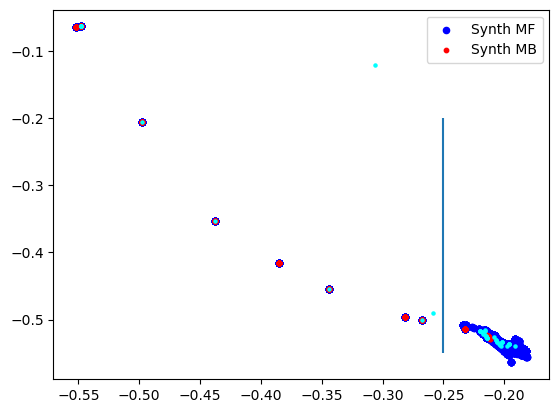

In [28]:
X_embedded_mse = torch.squeeze(model(torch.unsqueeze(torch.from_numpy(np.load(X_fname)).float(), 1))).detach().numpy()
print(X_embedded_mse.shape)

plt.figure()
mse_boundary = 42307

mf = plt.scatter(X_embedded_mse[:mse_boundary, 0], X_embedded_mse[:mse_boundary, 1], color='blue', s=20)
mb = plt.scatter(X_embedded_mse[mse_boundary:, 0], X_embedded_mse[mse_boundary:, 1], color='red', s=10)
extra = plt.scatter(b[:, 0], b[:, 1], color='cyan', s=5)

plt.legend((mf, mb), ('Synth MF', 'Synth MB'), loc='upper right')

border = -0.25
plt.vlines(border, -.55, -.2)

plt.show()

torch.unsqueeze(torch.from_numpy(np.load(X_fname)).float(), 1).shape

In [16]:
sigmoid_params.shape

(50, 3)

In [23]:
a = torch.unsqueeze(torch.from_numpy(sigmoid_params).float(), 1)

In [25]:
b = torch.squeeze(model(a)).detach().numpy()